
# Data Mining Project
---

## Stock Analysis: News affect the stock price or not?



### The Objective:

The object of this project is to analyze the new the related to the stock market, and see what it will affect to the stock prices. For example, if a new come out, the price is going to increase or decrease. In this project, we are focusing on analysing the new and stock price that how both of them are related.


### News Source

Most of the news, i choose from https://www.ganghoon.com/view/symbol/PTT

In [1]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from pylab import *
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import itertools
import matplotlib

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Get all the data in html pages

In this function, i use requests to send HTTP/1.1 requests using Python. With it, you can add content like headers, form data, multipart files, and parameters via simple Python libraries. It also allows you to access the response data of Python in the same way.

Beautiful Soup = a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work. 



In this project i use the website www.set.or.th in order to get the stock prices. The benefit of this web-site is that it provides many different type of data. However, the data is always fresh, it means that you cannot get the old stock price detail.

As you can see, i loop only 3 pages because on the web-site provide you only 3 pages history of the stock prices. In the future, i will find another web-site that provide all the history of the stock prices


### Example:
- Example of the link : https://www.set.or.th/set/historicaltrading.dosymbol=BA&page=0&language=en&country=US&type=trading




In [2]:
def get_detail(soup, all_data):
    # this function will loop each line in html to get the prices
    all_prices = []
    for i in soup.find_all('tr'): #loop all tr in that page
        each_prices =[]
        for j in i.find_all('td'): #loop all td in that page in tr
            each_prices.append(j.get_text())     
        all_prices.append(each_prices)
    all_prices = all_prices[1:] # cut of the first empty list
    return all_prices


def get_html_detail(each_stock):
    #this function is to get all html code in www.set.or.th
    page_number = 0
    all_data = []
    for i in range(0,3):
        url_front = 'https://www.set.or.th/set/historicaltrading.do?symbol='
        page = '&page='
#         url_bottom = '&language=th&country=TH&type=trading'#Thia
        url_bottom ='&language=en&country=US&type=trading'#Eng
        url = url_front+each_stock+page+str(i)+url_bottom
        b = requests.get(url).text
        print url
        soup = BeautifulSoup(b, 'lxml') #this to get all info in that url
        a = get_detail(soup, all_data)
        all_data.append(a)
    all_data = list(itertools.chain.from_iterable(all_data)) #this is to join list of lists
    return all_data

In [3]:
data = get_html_detail('THAI')
data[:2]

https://www.set.or.th/set/historicaltrading.do?symbol=THAI&page=0&language=en&country=US&type=trading
https://www.set.or.th/set/historicaltrading.do?symbol=THAI&page=1&language=en&country=US&type=trading
https://www.set.or.th/set/historicaltrading.do?symbol=THAI&page=2&language=en&country=US&type=trading


[[u'05/04/2017',
  u'18.50',
  u'18.50',
  u'18.30',
  u'18.30',
  u' -0.20',
  u' -1.08',
  u'1,905,685',
  u'35,007.77'],
 [u'04/04/2017',
  u'18.40',
  u'18.50',
  u'18.30',
  u'18.50',
  u' +0.10',
  u' +0.54',
  u'2,390,620',
  u'44,020.61']]

## Build the DataFrame


I use DataFrame from pandas to make a 2-dimensional data. The reason that i use is because i want to show the data as table in order to see the data, and use it to analysis.

In [4]:
# This seperate_lists function is to seperate the data in to category
def seperate_lists(values):
    data = [[],[],[],[],[],[],[],[],[]]
    for i in values:
        data[0].append(i[0])
        data[1].append(i[1])
        data[2].append(i[2])
        data[3].append(i[3])
        data[4].append(i[4])
        data[5].append(i[5])
        data[6].append(i[6])
        data[7].append(i[7])
        data[8].append(i[8])
    all_dates =  data[0]
    return data, all_dates

# this build_data_frame function is to build the data frame as show below
def build_data_frame(data):
    values = np.array(data)        
    labels = ['Date', 'Open Price', 'Hidhest Price','Lowest Price','Close Price', 'Change', 'Percent Change','Overall', 'Overall Baht' ]
    data, all_dates = seperate_lists(values)
    keep_val = {}
    count = 0
    for j in labels:
        keep_val[j] = data[count]
        count +=1
    table = pd.DataFrame(keep_val, columns=labels)
    original_table = table
    table = table.sort_index(ascending=False)
    table['Date'] = pd.to_datetime(table['Date'], format='%d%m%Y', errors='ignore')
    table = table.set_index(table['Date'])
    return table, original_table, data

In [5]:
# data1, data2, all_data =   build_data_frame(data)
create_data_frame, original_table, all_data = build_data_frame(data)
create_data_frame[:5]

,Date,Open Price,Hidhest Price,Lowest Price,Close Price,Change,Percent Change,Overall,Overall Baht
Date,,,,,,,,,
01/11/2016,01/11/2016,28.25,29.00,27.75,27.75,-0.25,-0.89,"57,605,834","1,635,328.31"
02/11/2016,02/11/2016,27.50,27.75,27.00,27.00,-0.75,-2.70,"28,633,549","781,836.50"
03/11/2016,03/11/2016,27.25,27.25,25.50,25.75,-1.25,-4.63,"52,098,849","1,380,111.59"
04/11/2016,04/11/2016,26.00,26.50,26.00,26.00,+0.25,+0.97,"21,953,332","575,601.69"
07/11/2016,07/11/2016,26.50,27.00,26.25,26.75,+0.75,+2.88,"13,848,841","369,233.07"


In [6]:
original_table[:5]

,Date,Open Price,Hidhest Price,Lowest Price,Close Price,Change,Percent Change,Overall,Overall Baht
0,05/04/2017,18.50,18.50,18.30,18.30,-0.20,-1.08,"1,905,685","35,007.77"
1,04/04/2017,18.40,18.50,18.30,18.50,+0.10,+0.54,"2,390,620","44,020.61"
2,03/04/2017,18.60,18.60,18.40,18.40,-0.10,-0.54,"4,286,413","79,206.12"
3,31/03/2017,18.40,18.70,18.40,18.50,+0.10,+0.54,"5,238,310","97,166.75"
4,30/03/2017,18.70,18.80,18.40,18.40,-0.30,-1.60,"7,666,022","141,991.07"


In [8]:
original_table[['Date', 'Close Price']][:6]

,Date,Close Price
0,05/04/2017,18.30
1,04/04/2017,18.50
2,03/04/2017,18.40
3,31/03/2017,18.50
4,30/03/2017,18.40
5,29/03/2017,18.70


## Build Graph

After we get all the data such as date of the stock price, all stock price, and so on. We build graph because we want to see the graph with the cut point when the new come out.

In [12]:
# This function is to find the cut line(the line of the news)
def find_dot(data, date_list):
    dates = []
    lowest_price_list = []
#     date_in_all_date = []
    date = data[0][::-1]
    lowest_price = data[3][::-1]
    for each_date in date_list:
        if each_date in date:
#             date_in_all_date.append(each_date)
            find_date_index = date.index(each_date)
            dates.append(find_date_index)
            lowest_price_list.append(lowest_price[find_date_index])
    return dates, lowest_price_list

In [13]:
def build_graph(data, name, date_list):
    values = np.array(data)
    data, all_dates = seperate_lists(values)
    length_data = len(data[0])
    dates, prices = find_dot(data, date_list) #Find the point to do dot plot
    x = np.linspace(0, length_data, length_data)
    y = data[4][::-1]
    labels = data[0][::-1]
    plt.figure(figsize=(25,15))
    plt.plot(x, y, 'r')    
    for xc in dates:
        plt.axvline(x=xc)
    plt.xticks(x, labels, rotation='vertical')
    plt.title(name)
    plt.xlabel('Date')
    plt.ylabel('Stock Prices')
    plt.figure()
    
def build_graph_dataFrame(data, each_stock):
    table2=data['Close Price'].astype(float)
    table2.plot(title=each_stock, figsize=(15, 7))
    plt.xticks(rotation='vertical')
    plt.figure()

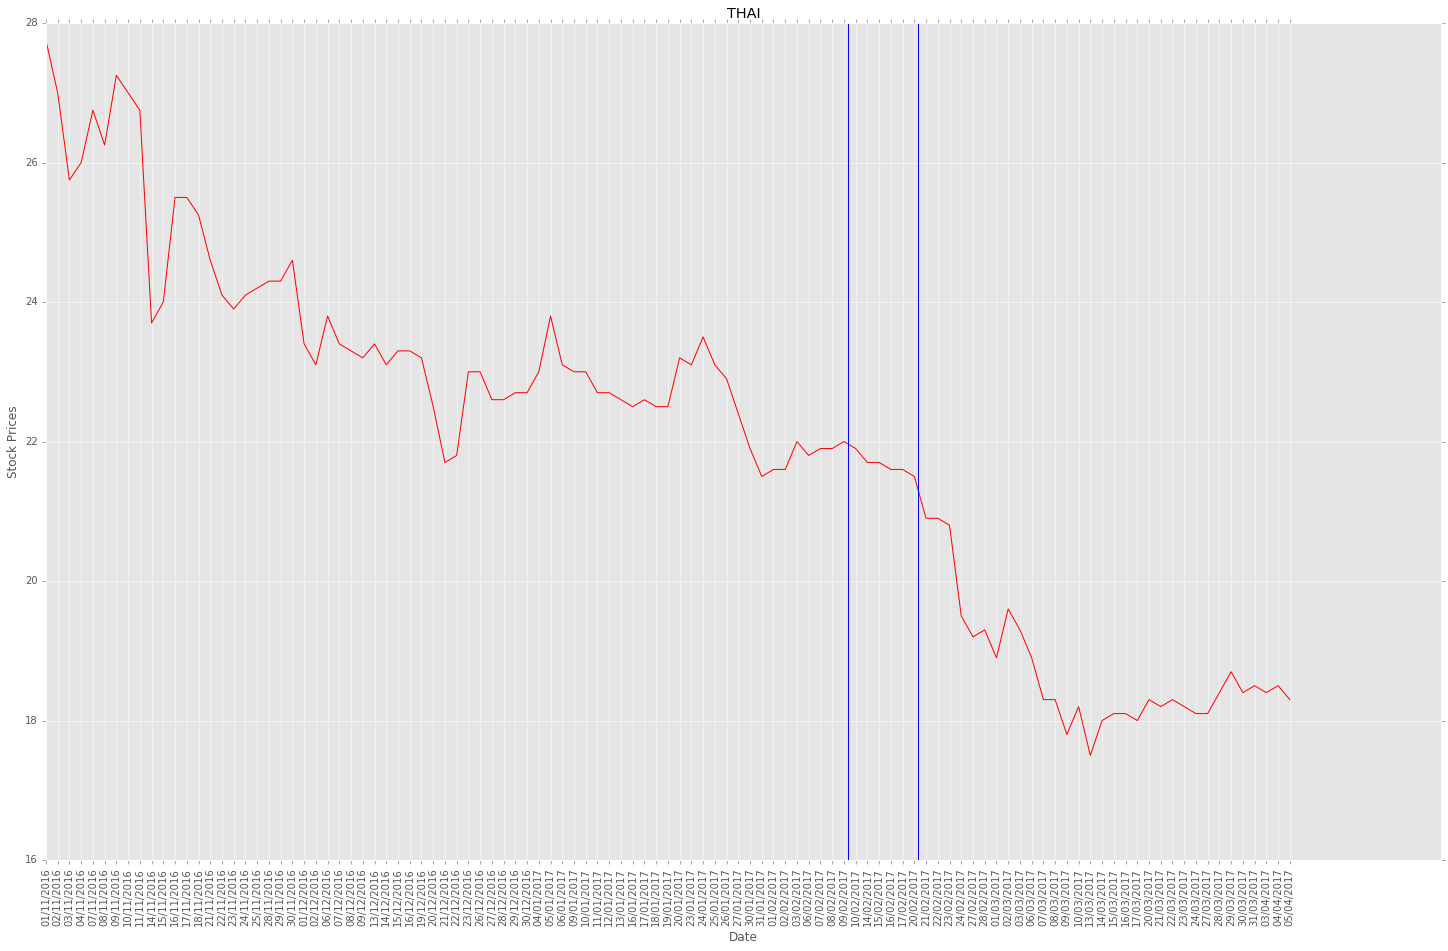

In [15]:
build_graph(data,'THAI', ['10/02/2017','21/02/2017'])

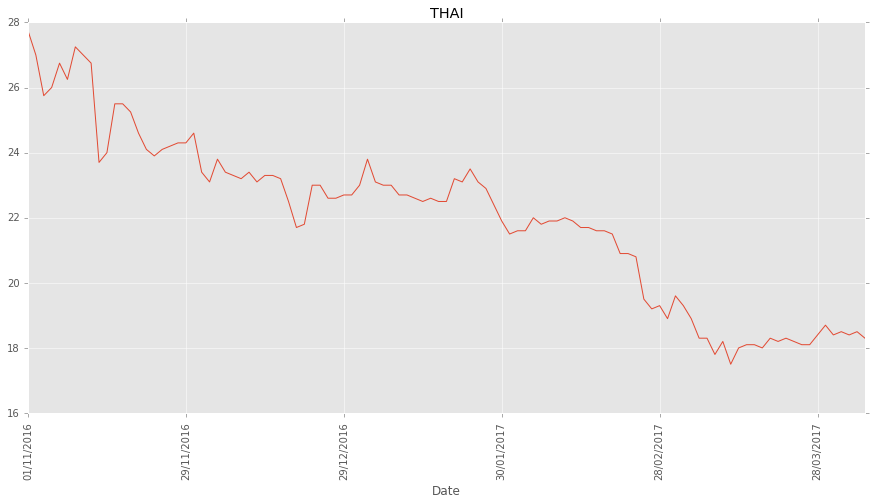

In [17]:
build_graph_dataFrame(create_data_frame, 'THAI')

## Find Date range between the new's date

In [20]:
def find_dates(all_date_lists, all_dates,length_interval):
    keep_interval_before =[]
    keep_interval_after =[]
    keep_dates = []
    for each_date in all_dates:
        if each_date in all_date_lists:
#             print each_date
            keep_dates.append(each_date)
            #if yes then we have to select the interval of that new date
            #for example new date = 18/01/2017, and it is in list of date that come from web.
            #then we have to pick interval date.
            get_index = all_date_lists.index(each_date)
            cut_dates_before = all_date_lists[get_index-length_interval:get_index]
            cut_dates_after = all_date_lists[get_index+1:get_index+(length_interval+1)]
            keep_interval_before.append(cut_dates_before)
            keep_interval_after.append(cut_dates_after)
    return keep_interval_before, keep_interval_after, keep_dates

In [21]:
date_list = [['10/02/2017','21/02/2017']]

interval_before, interval_after, keep_dates = find_dates(all_data[0][::-1], date_list[0],5)
print 'interval_before', interval_before
print '------------'
print 'interval_after', interval_after
print '------------'
print 'keep_dates', keep_dates

interval_before [[u'03/02/2017', u'06/02/2017', u'07/02/2017', u'08/02/2017', u'09/02/2017'], [u'14/02/2017', u'15/02/2017', u'16/02/2017', u'17/02/2017', u'20/02/2017']]
------------
interval_after [[u'14/02/2017', u'15/02/2017', u'16/02/2017', u'17/02/2017', u'20/02/2017'], [u'22/02/2017', u'23/02/2017', u'24/02/2017', u'27/02/2017', u'28/02/2017']]
------------
keep_dates ['10/02/2017', '21/02/2017']


## Calculate mean for each point
-----

In this function, we are going to calculate the mean for each date point. It means that we are going to pick the interval date before the new come out and also pick the interval date after the new come out.

For example:

### Assuming that we pick the interval length to be 5
1. The news that we pick = '18/01/2017'
2. Interval date before new come out = ['11/01/2017', '12/01/2017', '13/01/2017', '16/01/2017', '17/01/2017']
3. Interval date after new com out = ['19/01/2017', '20/01/2017', '23/01/2017', '24/01/2017', '25/01/2017']

Then we will use that date list to find the stock price.After that we will bring 2 of them and find that is the news affect the stock pric or not by calculating the mean of the stock price.

In [22]:
# Find Interval--------------------------------------------------------
def find_stock_price_each(interval, close_price, all_date):
    each_stock = []
    for each_date in interval:
        if each_date in all_date:
            get_index = all_date.index(each_date)
            each_price =  close_price[get_index]
            each_stock.append(each_price)
    return each_stock 

def find_stock_price(interval_before, interval_after, all_data):
    all_price_before = []
    all_price_after = []
    for each_list in range(len(interval_before)):
        prices_before = find_stock_price_each(interval_before[each_list], all_data[4][::-1], all_data[0][::-1])
        price_after = find_stock_price_each(interval_after[each_list], all_data[4][::-1], all_data[0][::-1])
        all_price_before.append(prices_before)
        all_price_after.append(price_after)
    return all_price_before, all_price_after

def find_mean(interval_before, interval_after,all_data):
    all_price_before, all_price_after = find_stock_price(interval_before, interval_after, all_data)
    all_price_before = [map(float, x) for x in all_price_before]
    all_price_after = [map(float, x) for x in all_price_after]
    keep_all_price_before =[]
    keep_all_price_after =[]
    for each_list in range(len(all_price_before)):
        mean_all_price_before = mean(all_price_before[each_list])
        mean_all_price_after = mean(all_price_after[each_list])
#         print'all_price_before[each_list]', all_price_before[each_list]
#         print 'mean_all_price_before', mean_all_price_before
#         print 'all_price_after[each_list]', all_price_after[each_list]
#         print 'mean_all_price_after', mean_all_price_after
        keep_all_price_before.append(mean_all_price_before)
        keep_all_price_after.append(mean_all_price_after)
    return keep_all_price_before, keep_all_price_after
# --------------------------------------------------------------------------------

In [23]:
mean_all_price_before, mean_all_price_after = find_mean(interval_before, interval_after,all_data)
print 'mean_all_price_before, mean_all_price_after', mean_all_price_before, mean_all_price_after

mean_all_price_before, mean_all_price_after [21.919999999999998, 21.619999999999997] [21.619999999999997, 19.940000000000001]


## Bar Chart

In order to show the difference of the mean of the close price that will be compared between the close price before the news come out and the close price after the news come out. Here, i use matplotlib to plot a group bar that show the difference between two of them.

In [24]:
def build_group_chart(mean_all_price_before,mean_all_price_after, date_list):
    n_groups = len(mean_all_price_before)
#     fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.25
    opacity = 0.6
    error_config = {'ecolor': '0.3'}
    plt.figure(figsize=(15,6))
    rects1 = plt.bar(index, mean_all_price_before, bar_width,
                     alpha=opacity,
                     color='b',
                     error_kw=error_config,
                     label='mean of new before')

    rects2 = plt.bar(index + bar_width, mean_all_price_after, bar_width,
                     alpha=opacity,
                     color='r',
                     error_kw=error_config,
                     label='mean of new after')
    plt.xlabel('Date')
    plt.ylabel('Mean Scores')
    plt.title('Scores by Date and Interval news')
    plt.xticks(index + bar_width , date_list)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.figure()
    


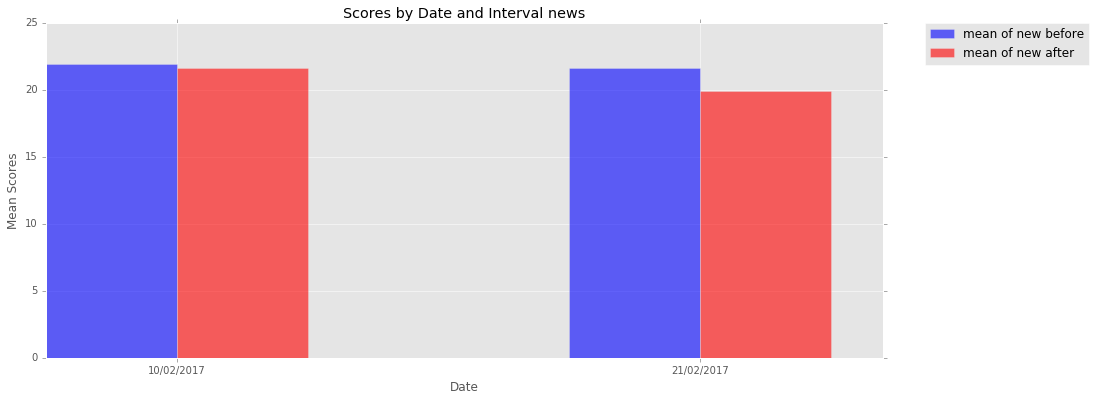

In [25]:
build_group_chart(mean_all_price_before,mean_all_price_after, keep_dates)

## Find the Accuracy

In [28]:
# Find Accuracy--------------------------------------------------------------------
# This mean if bad new come then we expect that the price will go down
def find_accuracy_bad(mean_all_price_before, mean_all_price_after):
    accu =[]
    correct = 0
    wrong = 0
    for i in range(len(mean_all_price_before)):
        if mean_all_price_before[i] > mean_all_price_after[i]:
            correct+=1
        else:
            wrong+=1
    accu.append(correct)
    accu.append(wrong)
    return accu

# This mean if good new come then we expect that the price will go up
def find_accuracy_good(mean_all_price_before, mean_all_price_after):
    accu =[]
    correct = 0
    wrong = 0
    for i in range(len(mean_all_price_before)):
        if mean_all_price_after[i] > mean_all_price_before[i]:
            correct+=1
        else:
            wrong+=1
    accu.append(correct)
    accu.append(wrong)
    return accu


# --------------------------------------------------------------------------------

In [29]:
accuracy = find_accuracy_bad(mean_all_price_before, mean_all_price_after)
print accuracy

[2, 0]


## Build a Pie Chart

In [30]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
def build_pie_chart(accuracy):
    labels = ['Correct', 'Wrong']
    # sizes = [38.4, 40.6, 20.7, 10.3]
    sizes = accuracy

    colors = ['lightskyblue', 'lightcoral','yellowgreen', 'gold']
    plt.pie(sizes, labels=labels, autopct=make_autopct(sizes),colors=colors, shadow=True, startangle=90)
#     patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, autopct=make_autopct(accuracy))
#     plt.legend(patches, labels, loc="best")
    plt.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

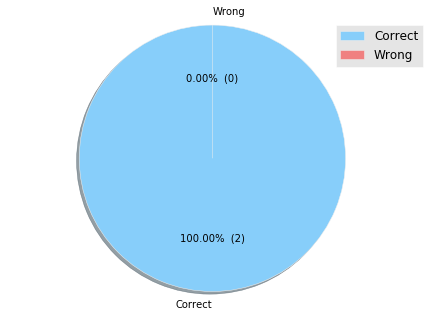

In [31]:
build_pie_chart(accuracy)


## This is where we start

In [33]:
def main(stock_names, date_list, length_interval,status):
    count = 0
    for each_stock in stock_names:
        print each_stock
        data = get_html_detail(each_stock)
        create_data_frame, original_table, all_data = build_data_frame(data)
        create_graph = build_graph(data, each_stock, date_list[count]) #plot graph using matplotlib
        #create_graph_dataFrame = build_graph_dataFrame(create_data_frame, each_stock)
        # we need point (x,y) to plot on the graph which is x = date & y = close price
        interval_before, interval_after, keep_dates = find_dates(all_data[0][::-1], date_list[count],length_interval)
        mean_all_price_before, mean_all_price_after = find_mean(interval_before, interval_after,all_data)
        build_group_chart(mean_all_price_before,mean_all_price_after, keep_dates)
        if status == 'bad':
#             print 'baddd'
            accuracy = find_accuracy_bad(mean_all_price_before, mean_all_price_after)
        elif status == 'good':
#             print 'goodddd'
            accuracy = find_accuracy_good(mean_all_price_before, mean_all_price_after)
        build_pie_chart(accuracy)
#         for each_length in range(length_interval):
#             interval_before, interval_after, keep_dates = find_dates(all_data[0][::-1], date_list[count],each_length+1)
#             mean_all_price_before, mean_all_price_after = find_mean(interval_before, interval_after,all_data)
#             build_group_chart(mean_all_price_before,mean_all_price_after, keep_dates)
        count += 1
    return 0

## Bad News

THAI
https://www.set.or.th/set/historicaltrading.do?symbol=THAI&page=0&language=en&country=US&type=trading
https://www.set.or.th/set/historicaltrading.do?symbol=THAI&page=1&language=en&country=US&type=trading
https://www.set.or.th/set/historicaltrading.do?symbol=THAI&page=2&language=en&country=US&type=trading


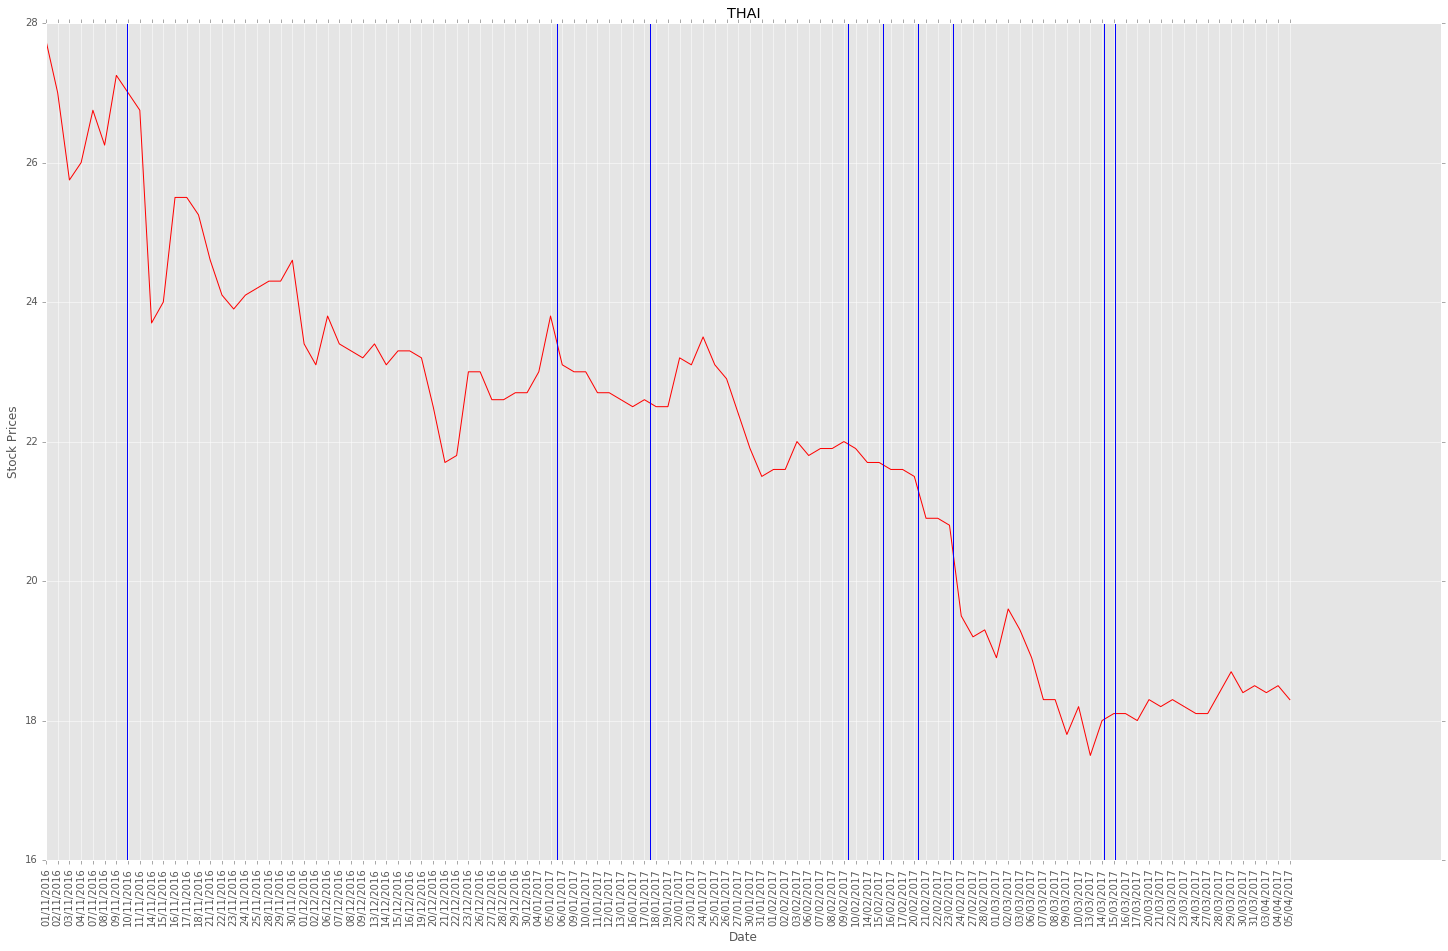

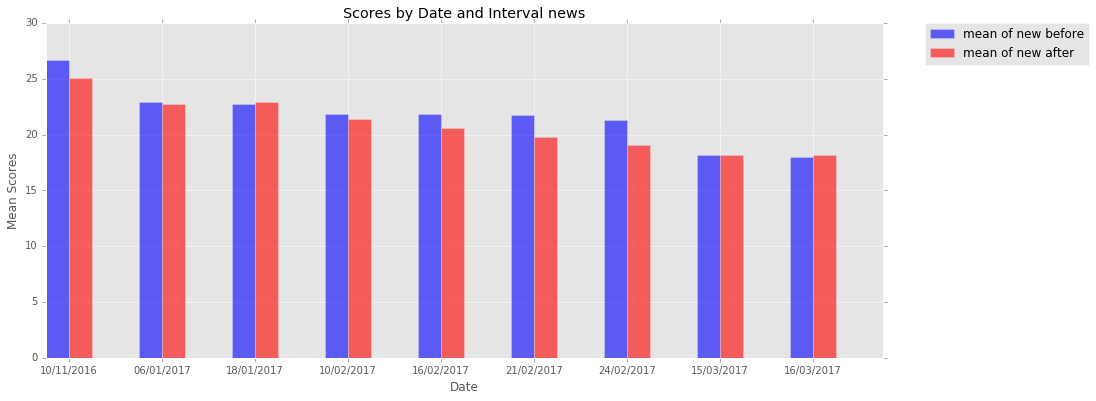

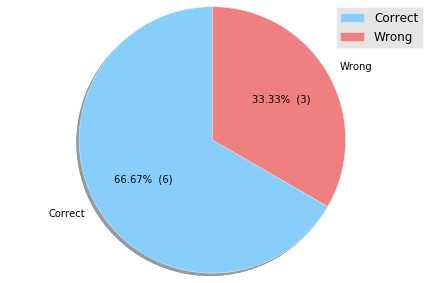

In [51]:
# THAI-------------------------------------------------------------------------------
# โรลส์รอยซ์ ==> '18/01/2017',04/02/2017','16/02/2017','19/02/2017'
# พนง.บินไทยร้องนายกฯใช้ม.44สอบทุจริต ==> '12/02/2017'
# การบินไทยแจงกรณีสหภาพฯร้องนายกฯ ==> '10/11/2016'
# กรมท่าอากาศยานแจ้งปิดสนามบินนครฯ2วัน ==> '06/01/2017'
# ------------------------------------------------------------------------------------
stock_names = ['THAI']
date_list = [['10/11/2016','06/01/2017','18/01/2017','04/02/2017','10/02/2017','12/02/2017','16/02/2017','19/02/2017','21/02/2017','24/02/2017','15/03/2017','16/03/2017']]
# stock_names = ['NOK']
# date_list = [ ['19/01/2017','31/01/2017','15/02/2017','17/02/2017','6/10/2016']]
ans = main(stock_names, date_list,7,'bad')



## Good News

PTT
https://www.set.or.th/set/historicaltrading.do?symbol=PTT&page=0&language=en&country=US&type=trading
https://www.set.or.th/set/historicaltrading.do?symbol=PTT&page=1&language=en&country=US&type=trading
https://www.set.or.th/set/historicaltrading.do?symbol=PTT&page=2&language=en&country=US&type=trading


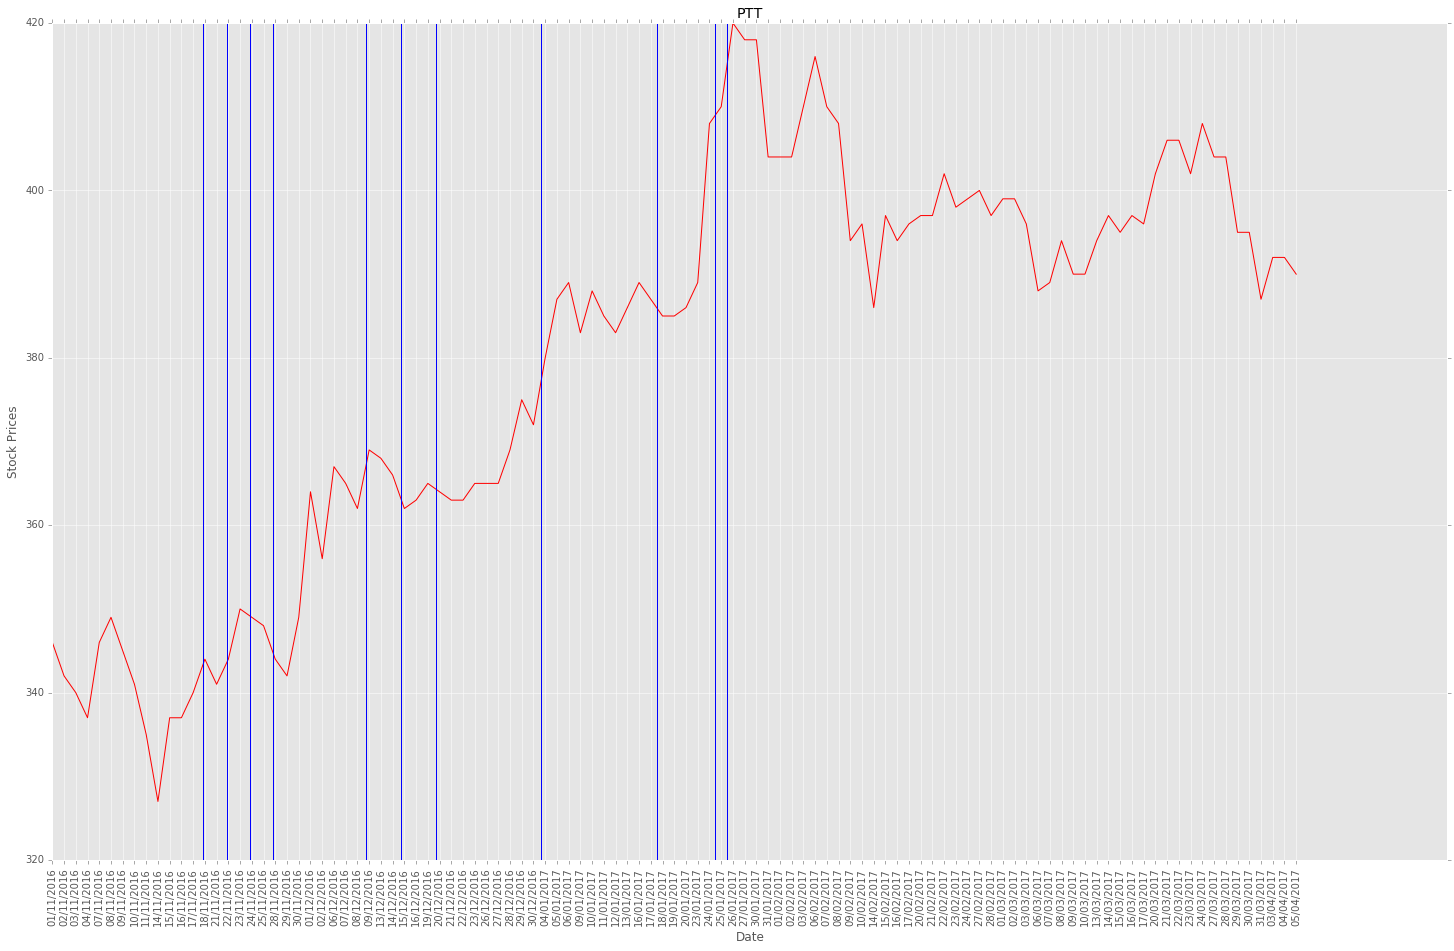

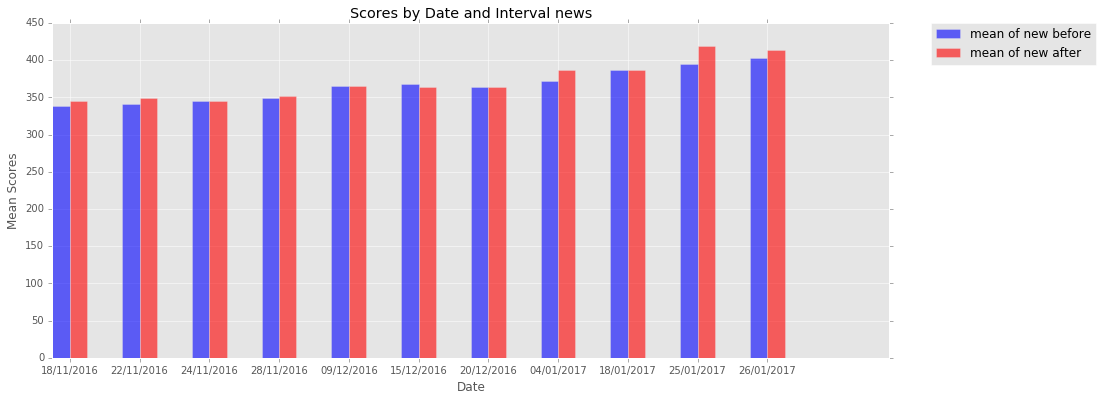

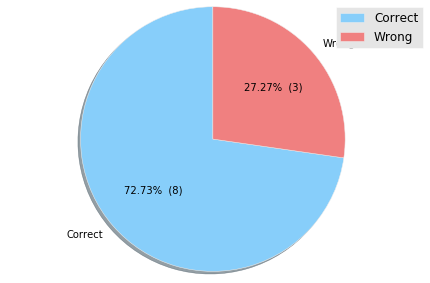

In [52]:

# THAI--------------------------------------------------------
# http://www.ryt9.com/s/iq05/2553205 ==> '18/11/2016'
# http://www.efinancethai.com/LastestNews/index.aspx?id=Re77Dxzoq5Y%3D&year=2016&month=11&lang=T ==> '22/11/2016'
# http://www.thairath.co.th/content/792072 ==> '24/11/2016'
# http://www.thairath.co.th/content/794951 ==> '28/11/2016'
# http://www.thairath.co.th/content/806686 ==> '09/12/2016'
# http://www.efinancethai.com/LastestNews/index.aspx?id=LEzd9ikhyGk%3D&year=2016&month=12&lang=T ==> '15/12/2016'
# http://www.efinancethai.com/LastestNews/index.aspx?id=5Lboqw5ykxs%3D&year=2016&month=12&lang=T ==> '20/12/2016'
# http://www.thairath.co.th/content/827978 ==> '04/01/2017'
stock_names = ['PTT']
date_list = [['18/11/2016','22/11/2016','24/11/2016','28/11/2016','09/12/2016','15/12/2016','20/12/2016','04/01/2017','18/01/2017','21/01/2017', '25/01/2017', '26/01/2017']]
# --------------------------------------------------------------



ans = main(stock_names, date_list, 3,'good')